<a href="https://colab.research.google.com/github/dalgual/bigdai.github.io/blob/main/python/orca/colab-notebook/quickstart/tf2_keras_lenet_mnist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


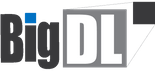
---

##### Copyright 2016 The BigDL Authors.

In [1]:
#@title Licensed under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
#
#     http://www.apache.org/licenses/LICENSE-2.0
#
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and
# limitations under the License.
#

## **Environment Preparation**

**Install Java 8**

Run the cell on the **Google Colab** to install jdk 1.8.

**Note:** if you run this notebook on your computer, root permission is required when running the cell to install Java 8. (You may ignore this cell if Java 8 has already been set up in your computer).


In [2]:
# Install jdk8
!apt-get install openjdk-8-jdk-headless -qq > /dev/null
import os
# Set environment variable JAVA_HOME.
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"
!update-alternatives --set java /usr/lib/jvm/java-8-openjdk-amd64/jre/bin/java
!java -version

update-alternatives: using /usr/lib/jvm/java-8-openjdk-amd64/jre/bin/java to provide /usr/bin/java (java) in manual mode
openjdk version "1.8.0_312"
OpenJDK Runtime Environment (build 1.8.0_312-8u312-b07-0ubuntu1~18.04-b07)
OpenJDK 64-Bit Server VM (build 25.312-b07, mixed mode)


**Install BigDL Orca**

You can install the latest pre-release version using `pip install --pre --upgrade bigdl-orca`. 

In [3]:
# Install latest pre-release version of BigDL Orca 
# Installing BigDL Orca from pip will automatically install pyspark, bigdl, and their dependencies.
!pip install --pre --upgrade bigdl-orca[ray]

     |████████████████████████████████| 23.9 MB 63.6 MB/s 
     |████████████████████████████████| 71.0 MB 352 bytes/s 
     |████████████████████████████████| 107.0 MB 21 kB/s 
     |████████████████████████████████| 35.4 MB 406 kB/s 
     |████████████████████████████████| 1.1 MB 42.7 MB/s 
     |████████████████████████████████| 57.6 MB 1.2 MB/s 
     |████████████████████████████████| 85 kB 3.7 MB/s 
     |████████████████████████████████| 65 kB 3.7 MB/s 
     |████████████████████████████████| 271 kB 44.2 MB/s 
     |████████████████████████████████| 144 kB 44.3 MB/s 
     |████████████████████████████████| 94 kB 3.1 MB/s 
     |████████████████████████████████| 218.4 MB 53 kB/s 
     |████████████████████████████████| 197 kB 41.2 MB/s 
     |████████████████████████████████| 224 kB 35.6 MB/s 
     |████████████████████████████████| 3.0 MB 35.9 MB/s 
     |████████████████████████████████| 82 kB 170 kB/s 
     |████████████████████████████████| 128 kB 57.2 MB/s 
     |████████████

## **Distributed TensorFlow 2 using Orca APIs**

In this guide we will describe how to scale out TensorFlow 2 programs using Orca in 4 simple steps.

In [4]:
# import necesary libraries and modules
import argparse

from bigdl.orca import init_orca_context, stop_orca_context
from bigdl.orca import OrcaContext

### **Step 1: Init Orca Context** 

In [5]:
# recommended to set it to True when running BigDL in Jupyter notebook 
OrcaContext.log_output = True # (this will display terminal's stdout and stderr in the Jupyter notebook).

cluster_mode = "local"

if cluster_mode == "local":  
    init_orca_context(cluster_mode="local", cores=1) # run in local mode
elif cluster_mode == "k8s":  
    init_orca_context(cluster_mode="k8s", num_nodes=2, cores=2) # run on K8s cluster
elif cluster_mode == "yarn":  
    init_orca_context(cluster_mode="yarn-client", num_nodes=2, cores=2) # run on Hadoop YARN cluster

Initializing orca context
Current pyspark location is : /usr/local/lib/python3.7/dist-packages/pyspark/__init__.py
Start to getOrCreate SparkContext
pyspark_submit_args is:  --driver-class-path /usr/local/lib/python3.7/dist-packages/bigdl/share/orca/lib/bigdl-orca-spark_2.4.6-2.1.0-SNAPSHOT-jar-with-dependencies.jar:/usr/local/lib/python3.7/dist-packages/bigdl/share/dllib/lib/bigdl-dllib-spark_2.4.6-2.1.0-SNAPSHOT-jar-with-dependencies.jar pyspark-shell 
[main] WARN  org.apache.hadoop.util.NativeCodeLoader  - Unable to load native-hadoop library for your platform... using builtin-java classes where applicable


Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).


2022-03-18 01:02:21,174 Thread-4 WARN The bufferSize is set to 4000 but bufferedIo is false: false
2022-03-18 01:02:21,182 Thread-4 WARN The bufferSize is set to 4000 but bufferedIo is false: false
2022-03-18 01:02:21,191 Thread-4 WARN The bufferSize is set to 4000 but bufferedIo is false: false
2022-03-18 01:02:21,193 Thread-4 WARN The bufferSize is set to 4000 but bufferedIo is false: false
22-03-18 01:02:21 [Thread-4] INFO  Engine$:121 - Auto detect executor number and executor cores number
22-03-18 01:02:21 [Thread-4] INFO  Engine$:123 - Executor number is 1 and executor cores number is 1



User settings:

   KMP_AFFINITY=granularity=fine,compact,1,0
   KMP_BLOCKTIME=0
   KMP_SETTINGS=1
   OMP_NUM_THREADS=1

Effective settings:

   KMP_ABORT_DELAY=0
   KMP_ADAPTIVE_LOCK_PROPS='1,1024'
   KMP_ALIGN_ALLOC=64
   KMP_ALL_THREADPRIVATE=128
   KMP_ATOMIC_MODE=2
   KMP_BLOCKTIME=0
   KMP_CPUINFO_FILE: value is not defined
   KMP_DETERMINISTIC_REDUCTION=false
   KMP_DEVICE_THREAD_LIMIT=2147483647
   KMP_DISP_HAND_THREAD=false
   KMP_DISP_NUM_BUFFERS=7
   KMP_DUPLICATE_LIB_OK=false
   KMP_FORCE_REDUCTION: value is not defined
   KMP_FOREIGN_THREADS_THREADPRIVATE=true
   KMP_FORKJOIN_BARRIER='2,2'
   KMP_FORKJOIN_BARRIER_PATTERN='hyper,hyper'
   KMP_FORKJOIN_FRAMES=true
   KMP_FORKJOIN_FRAMES_MODE=3
   KMP_GTID_MODE=3
   KMP_HANDLE_SIGNALS=false
   KMP_HOT_TEAMS_MAX_LEVEL=1
   KMP_HOT_TEAMS_MODE=0
   KMP_INIT_AT_FORK=true
   KMP_ITT_PREPARE_DELAY=0
   KMP_LIBRARY=throughput
   KMP_LOCK_KIND=queuing
   KMP_MALLOC_POOL_INCR=1M
   KMP_MWAIT_HINTS=0
   KMP_NUM_LOCKS_IN_BLOCK=1
   KMP_

22-03-18 01:02:23 [Thread-4] INFO  ThreadPool$:95 - Set mkl threads to 1 on thread 14
[Thread-4] WARN  org.apache.spark.SparkContext  - Using an existing SparkContext; some configuration may not take effect.
22-03-18 01:02:23 [Thread-4] INFO  Engine$:446 - Find existing spark context. Checking the spark conf...
cls.getname: com.intel.analytics.bigdl.dllib.utils.python.api.Sample
BigDLBasePickler registering: bigdl.dllib.utils.common  Sample
cls.getname: com.intel.analytics.bigdl.dllib.utils.python.api.EvaluatedResult
BigDLBasePickler registering: bigdl.dllib.utils.common  EvaluatedResult
cls.getname: com.intel.analytics.bigdl.dllib.utils.python.api.JTensor
BigDLBasePickler registering: bigdl.dllib.utils.common  JTensor
Successfully got a SparkContextcls.getname: com.intel.analytics.bigdl.dllib.utils.python.api.JActivity
BigDLBasePickler registering: bigdl.dllib.utils.common  JActivity



This is the only place where you need to specify local or distributed mode. View [Orca Context](https://bigdl.readthedocs.io/en/latest/doc/Orca/Overview/orca-context.html) for more details.

**Note**: You should export HADOOP_CONF_DIR=/path/to/hadoop/conf/dir when you run on Hadoop YARN cluster.

### **Step 2: Define the Model**

You can then define the Keras model in the *Creator Function* using the standard TensroFlow 2 APIs.

In [6]:
def model_creator(config):
    import tensorflow as tf
    model = tf.keras.Sequential(
        [tf.keras.layers.Conv2D(20, kernel_size=(5, 5), strides=(1, 1), activation='tanh',
                                input_shape=(28, 28, 1), padding='valid'),
         tf.keras.layers.MaxPooling2D(pool_size=(2, 2), strides=(2, 2), padding='valid'),
         tf.keras.layers.Conv2D(50, kernel_size=(5, 5), strides=(1, 1), activation='tanh',
                                padding='valid'),
         tf.keras.layers.MaxPooling2D(pool_size=(2, 2), strides=(2, 2), padding='valid'),
         tf.keras.layers.Flatten(),
         tf.keras.layers.Dense(500, activation='tanh'),
         tf.keras.layers.Dense(10, activation='softmax'),
         ]
    )

    model.compile(optimizer=tf.keras.optimizers.RMSprop(),
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])
    return model

### **Step 3: Define Train Dataset**

You can define the dataset in the _Creator Function_ using standard [tf.data.Dataset](https://www.tensorflow.org/api_docs/python/tf/data/Dataset) APIs. 

In [7]:
def preprocess(x, y):
    import tensorflow as tf
    x = tf.cast(tf.reshape(x, (28, 28, 1)), dtype=tf.float32) / 255.0
    return x, y

def train_data_creator(config, batch_size):
    import tensorflow as tf
    (train_feature, train_label), _ = tf.keras.datasets.mnist.load_data()

    dataset = tf.data.Dataset.from_tensor_slices((train_feature, train_label))
    dataset = dataset.repeat()
    dataset = dataset.map(preprocess)
    dataset = dataset.shuffle(1000)
    dataset = dataset.batch(batch_size)
    return dataset

def val_data_creator(config, batch_size):
    import tensorflow as tf
    _, (val_feature, val_label) = tf.keras.datasets.mnist.load_data()

    dataset = tf.data.Dataset.from_tensor_slices((val_feature, val_label))
    dataset = dataset.repeat()
    dataset = dataset.map(preprocess)
    dataset = dataset.batch(batch_size)
    return dataset

### **Step 4: Fit with Orca Estimator**

First, create an Estimator.



In [8]:
from bigdl.orca.learn.tf2 import Estimator

batch_size = 320
est = Estimator.from_keras(model_creator=model_creator, workers_per_node=1)

2022-03-18 01:02:29,957	INFO services.py:1340 -- View the Ray dashboard at http://172.28.0.2:8265


{'node_ip_address': '172.28.0.2', 'raylet_ip_address': '172.28.0.2', 'redis_address': '172.28.0.2:6379', 'object_store_address': '/tmp/ray/session_2022-03-18_01-02-24_788139_60/sockets/plasma_store', 'raylet_socket_name': '/tmp/ray/session_2022-03-18_01-02-24_788139_60/sockets/raylet', 'webui_url': '172.28.0.2:8265', 'session_dir': '/tmp/ray/session_2022-03-18_01-02-24_788139_60', 'metrics_export_port': 56504, 'node_id': '41883e72914e55b98ce1353c46e363af447319ac086839717b3569d0'}


(Worker pid=603) WARNING:tensorflow:From /usr/local/lib/python3.7/dist-packages/bigdl/orca/learn/tf2/tf_runner.py:317: _CollectiveAllReduceStrategyExperimental.__init__ (from tensorflow.python.distribute.collective_all_reduce_strategy) is deprecated and will be removed in a future version.
(Worker pid=603) Instructions for updating:
(Worker pid=603) use distribute.MultiWorkerMirroredStrategy instead
(Worker pid=603) 2022-03-18 01:02:44.592280: E tensorflow/stream_executor/cuda/cuda_driver.cc:271] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected


Next, fit the Estimator.

In [9]:
max_epoch=1
stats = est.fit(train_data_creator,
                epochs=max_epoch,
                batch_size=batch_size,
                steps_per_epoch=60000 // batch_size,
                validation_data=val_data_creator,
                validation_steps=10000 // batch_size)
est.save("/tmp/mnist_keras.ckpt")

(Worker pid=603) Downloading data from https://storage.googleapis.com/tensorflow/tf-keras-datasets/mnist.npz
11501568/11490434 [==============================] - 0s 0us/step


(Worker pid=603) WARNING:tensorflow:AutoGraph could not transform <function preprocess at 0x7fbc54931050> and will run it as-is.
(Worker pid=603) Cause: Unable to locate the source code of <function preprocess at 0x7fbc54931050>. Note that functions defined in certain environments, like the interactive Python shell, do not expose their source code. If that is the case, you should define them in a .py source file. If you are certain the code is graph-compatible, wrap the call using @tf.autograph.experimental.do_not_convert. Original error: could not get source code
(Worker pid=603) To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
(Worker pid=603) WARNING:tensorflow:AutoGraph could not transform <function preprocess at 0x7fbc549e4170> and will run it as-is.
(Worker pid=603) Cause: Unable to locate the source code of <function preprocess at 0x7fbc549e4170>. Note that functions defined in certain environments, like the interactive Python shell, 

187/187 [==============================] - ETA: 0s - loss: 0.2381 - accuracy: 0.9290


(Worker pid=603) 2022-03-18 01:03:45.633685: W tensorflow/core/grappler/optimizers/data/auto_shard.cc:776] AUTO sharding policy will apply DATA sharding policy as it failed to apply FILE sharding policy because of the following reason: Found an unshardable source dataset: name: "TensorSliceDataset/_2"
(Worker pid=603) op: "TensorSliceDataset"
(Worker pid=603) input: "Placeholder/_0"
(Worker pid=603) input: "Placeholder/_1"
(Worker pid=603) attr {
(Worker pid=603)   key: "Toutput_types"
(Worker pid=603)   value {
(Worker pid=603)     list {
(Worker pid=603)       type: DT_UINT8
(Worker pid=603)       type: DT_UINT8
(Worker pid=603)     }
(Worker pid=603)   }
(Worker pid=603) }
(Worker pid=603) attr {
(Worker pid=603)   key: "_cardinality"
(Worker pid=603)   value {
(Worker pid=603)     i: 10000
(Worker pid=603)   }
(Worker pid=603) }
(Worker pid=603) attr {
(Worker pid=603)   key: "is_files"
(Worker pid=603)   value {
(Worker pid=603)     b: false
(Worker pid=603)   }
(Worker pid=603) }

187/187 [==============================] - 60s 308ms/step - loss: 0.2381 - accuracy: 0.9290 - val_loss: 0.0832 - val_accuracy: 0.9721


'/tmp/mnist_keras.ckpt'

Finally, evaluate using the Estimator.

In [10]:
stats = est.evaluate(val_data_creator, num_steps=10000 // batch_size)
est.shutdown()
print(stats)

(Worker pid=603) WARNING:tensorflow:AutoGraph could not transform <function preprocess at 0x7fbc51b3fc20> and will run it as-is.
(Worker pid=603) Cause: Unable to locate the source code of <function preprocess at 0x7fbc51b3fc20>. Note that functions defined in certain environments, like the interactive Python shell, do not expose their source code. If that is the case, you should define them in a .py source file. If you are certain the code is graph-compatible, wrap the call using @tf.autograph.experimental.do_not_convert. Original error: could not get source code
(Worker pid=603) To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
(Worker pid=603) 2022-03-18 01:04:12.435779: W tensorflow/core/grappler/optimizers/data/auto_shard.cc:776] AUTO sharding policy will apply DATA sharding policy as it failed to apply FILE sharding policy because of the following reason: Found an unshardable source dataset: name: "TensorSliceDataset/_2"
(Worker pid=603

31/31 [==============================] - 0s 13ms/step - loss: 0.0982 - accuracy: 0.9667
{'validation_loss': 0.09824127703905106, 'validation_accuracy': 0.9667338728904724}


Now, the accuracy of this model has reached 98%.

In [11]:
# Stop orca context when your program finishes
stop_orca_context()

Stopping orca context
